# s04: Statistical Comparisons

Whenever we have data, we often want to use statistical analyses to explore, compare, and quantify our data. 

In this notebook, we will briefly introduce and explore some common statistical tests that can be applied to data. 

As with many of the topics in data analysis and machine learning, this tutorial is focused on introducing some related topics for data science, and demonstrated their application in Python, but it is out of scope of these tutorials to systematically introduce and describe the topic at hand, which in this case is statistics. If the topics here are unfamiliar, we recommend you follow the links or look for other resources to learn more about these topics. 

In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import norm

In [2]:
# Set random seed, for consistency simulating data
np.random.seed(21)

## On Causality

Before we dive into particular statistical tests, just a general reminder that though we would often like to understand the _causal structure_ of the data that we are interested in, this is generally not directly interpretable from statistical tests themselves. 

In the follow, we will explore some statistical tests for investigating if and when distributions of data are the same or different, and if and how related they are. These tests, by themselves, do not tell us about what causes what. Correlation is not causation.

In the context of data science, this can be a limitation as we are often using previously collected datasets of convenience and observational datasets collected. Though we can explore the structure of the data, such datasets typically do not allow for causal interpretations.

## Correlations

A common question we may be interested in is if two datasets, or two features of data, are related to each other. 

If they, we would also like to now _how_ related they are to each other. 

For this, we can calculate correlations between features. 

<div class="alert alert-success">
Correlations are statistical dependencies or relationships between variables. 
<p></p>
</div>

<div class="alert alert-info">
Correlation on 
<a href=https://en.wikipedia.org/wiki/Correlation_and_dependence class="alert-link">wikipedia</a>, 
including for the 
<a href=https://en.wikipedia.org/wiki/Pearson_correlation_coefficient class="alert-link">pearson</a>, 
and 
<a href=https://en.wikipedia.org/wiki/Spearman%27s_rank_correlation_coefficient class="alert-link">spearman</a>
correlation measures.     
<p></p>
</div>

In [3]:
from scipy.stats import pearsonr, spearmanr

### Simulate Data

First, let's simulate some data. 

For this example, we will simulate two arrays of data that do have a relationship to each other. 

In [4]:
# Settings for simulated data
corr = 0.75
covs = [[1, corr], [corr, 1]]
means = [0, 0]

# Generate the data (d1 and d2 are two normal distributed sets with a correlation of .75)
d1, d2 = np.random.multivariate_normal(means, covs, 1000).T

### Calculate Correlations

Next, we can calculate the correlation coefficient between our data arrays, using the `pearsonr` function from `scipy.stats`. 

In [5]:
# Calculate a pearson correlation between two arrays of data
r_val, p_val = pearsonr(d1, d2)

In [6]:
print(f"The correlation coefficient is {r_val:1.4f} with a p-value of {p_val:1.2f}.")

The correlation coefficient is 0.7732 with a p-value of 0.00.


In this case, we have a high correlation coefficient, with a very low p-value. 

This suggests our data are strongly correlated!

In this case, since we simulated the data, we know that this is a good estimation of the relationship between the data.

### Rank Correlations

One thing to keep in mind is that the `pearson` correlation used above assumes that both data distributions are normally distributed.

These assumptions should also be tested in data to be analyzed. 

Sometimes these assumptions will not be met. In that case, one option is to a different kind of correlation example. For example, the `spearman` correlation is a rank correlation that does not have the same assumptions as pearson.

In [7]:
# Calculate the spearman rank correlation between our data
r_val, p_val = spearmanr(d1, d2)

# Check the results of the spearman correlation
print(f"The correlation coefficient is {r_val:1.4f} with a p-value of {p_val:1.2f}.")


The correlation coefficient is 0.7595 with a p-value of 0.00.


In this case, the measured values for `pearson` and `spearman` correlations are about the same, since both are appropriate for the properties of this data.

## T-Tests

Another question we might often want to ask about data is to check and detect when there is a significant difference between collections of data. 

For example, we might want to analyze if there is a significant different in measured feature values between some groups of interest. 

To do so, we can use t-tests. 

There are different variants of t-test, including:
- one sample t-test
    - test the mean of one group of data
- independent samples t-test
    - test for a difference of means between two independent samples of data
- related samples t-test
    - test for a difference of means between two related samples of data
    
For this example, we will explore using the independent samples t-test. 

Functions for the other versions are also available in `scipy.stats`. 

<div class="alert alert-success">
T-tests are statistical hypothesis tests for examining mean values and differences of groups of data. 
<p></p>
</div>

<div class="alert alert-info">
T-tests on
<a href=https://en.wikipedia.org/wiki/Student%27s_t-test class="alert-link">wikipedia</a>. 
<p></p>
</div>

In [8]:
from scipy.stats import ttest_ind

### Simulate Data

First, let's simulate some data. 

For this example, we will simulate two samples of normally distributed data. 

In [9]:
# Settings for data simulation
n_samples = 250

# Simulate some data
d1 = norm.rvs(loc=0.5, scale=1, size=n_samples)
d2 = norm.rvs(loc=0.75, scale=1, size=n_samples)

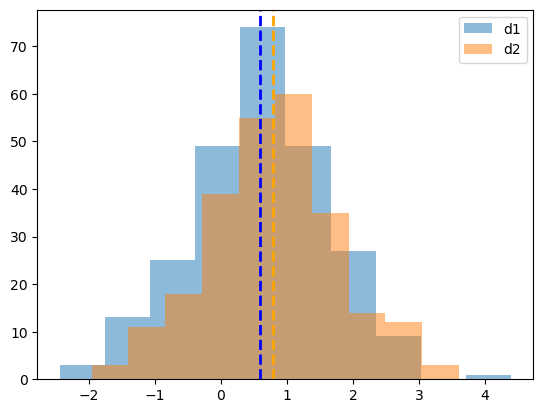

In [10]:
# Visualize our data comparison
plt.hist(d1, alpha=0.5, label='d1');
plt.axvline(np.mean(d1), linestyle='--', linewidth=2, color='blue')
plt.hist(d2, alpha=0.5, label='d2');
plt.axvline(np.mean(d2), linestyle='--', linewidth=2, color='orange')
plt.legend();

### Calculate T-Tests

Now that we have some data, let's use a t-tests to statistically compare the two groups of data. 

For this example, we will test whether the two distributions have significantly different means. 

In [11]:
# Run independent samples t-test
t_val, p_val = ttest_ind(d1, d2)

In [12]:
# Check the results of the t-test
print(f'T-Test comparison of d1 & d2:')
print(f'\t T-value \t {t_val:1.4f}')
print(f'\t p-value \t {p_val:1.2e}')

T-Test comparison of d1 & d2:
	 T-value 	 -2.2502
	 p-value 	 2.49e-02


In this case, the t-test shows that there is a significant difference in the mean of the two arrays of data!

### Assumptions of T-Tests

Note, again, that t-tests assume normally distributed data. This is again a property of the data that should be examined before applying statistical tests. If this assumption is not met, other approaches for comparing the data may be needed.

## Effect Size

One thing to keep in mind about hypothesis tests such as the t-test above is that they while they can be used to _is there a difference_ between two sets of data, they do not answer the question of _how different are they_.
Often, we would also like to measure how different groups of data are. To do so, we can use effect size measures, which can be used to estimate the magnitude of changes or differences. There are many methods and approaches to measuring effect sizes across different contexts. 

For this example, we will use cohens-d effect size estimate for differences in means.

<div class="alert alert-success">
Effect size measurements are measurements of the magnitude of a particular effect.
<p></p>
</div>

<div class="alert alert-info">
Effect sizes on 
<a href=https://en.wikipedia.org/wiki/Effect_size class="alert-link">wikipedia</a>. You can find a great blog post about cohen's d <a href= https://rpsychologist.com/cohend/ class="alert-link">here</a>.
<p></p>
</div> 

### Defining Effect Size Code

Often, when analyzing data, we will want to apply some measure that we may not find already available, in which case we may need to implement a version ourselves. 

For this example, we will implement cohens-d, an effect size measure for differences of means. Briefly, is a calculation of the difference of means between two distributions, divided by the pooled standard deviation. As such, cohens-d is a standardized measure, meaning the output value is independent of the units of the inputs. 

The formula to calculate the pooled standard deviation is:

$$ SD_{pooled}= \sqrt{\frac{[(n_1 - 1) * (SD_1)^2] + [(n_2 - 1) * (SD_2)^2]}{n_1 + n_2 - 2}} $$

The formula to calculate **Cohen’s d** is:

$$ d = \frac{M_1 - M_2}{SD_{pooled}} $$


Note that `math` and `statistics` are standard library modules that contain some useful basic numerical functionality.

In [13]:
from math import sqrt
from statistics import mean, stdev

def compute_cohens_d(data_1, data_2):
    """Compute cohens-d effect size.
    
    Parameters
    ----------
    data_1, data_2 : 1d array
        Array of data to compute the effect size between.
        
    Returns
    -------
    cohens_d : float
        The computed effect size measure. 
    """

    # Calculate group means
    d1_mean = mean(data_1)
    d2_mean = mean(data_2)
    
    # Calculate group standard deviations
    d1_std = stdev(data_1)
    d2_std = stdev(data_2)
    
    # Calculate the pooled standard deviation
    pooled_std = sqrt((d1_std ** 2 + d2_std ** 2) / 2)
    
    # Calculate cohens-d
    cohens_d = (d1_mean - d2_mean) / pooled_std

    return cohens_d

In [14]:
# Calculate the cohens-d effect size for our simulated data from before
cohens_d = compute_cohens_d(d2, d1)

In [15]:
# Check the measured value of the effect size
print(f'The cohens-d effect size is {cohens_d:1.2f}.')

The cohens-d effect size is 0.20.


A cohens-d effect size of ~0.2 is a small or modest effect. 

In combination with our t-test above, we can conclude that there is a difference of means between the two groups of data, but that the magnitude of this difference is relatively small. 

## Exercise

For this exercise we will use the taxis dataset from the seaborn package. First load the data as follows:

In [16]:
df = sns.load_dataset("taxis")
df.head()

,pickup,dropoff,passengers,distance,fare,tip,tolls,total,color,payment,pickup_zone,dropoff_zone,pickup_borough,dropoff_borough
0,2019-03-23 20:21:09,2019-03-23 20:27:24,1,1.60,7.0,2.15,0.0,12.95,yellow,credit card,Lenox Hill West,UN/Turtle Bay South,Manhattan,Manhattan
1,2019-03-04 16:11:55,2019-03-04 16:19:00,1,0.79,5.0,0.00,0.0,9.30,yellow,cash,Upper West Side South,Upper West Side South,Manhattan,Manhattan
2,2019-03-27 17:53:01,2019-03-27 18:00:25,1,1.37,7.5,2.36,0.0,14.16,yellow,credit card,Alphabet City,West Village,Manhattan,Manhattan
3,2019-03-10 01:23:59,2019-03-10 01:49:51,1,7.70,27.0,6.15,0.0,36.95,yellow,credit card,Hudson Sq,Yorkville West,Manhattan,Manhattan
4,2019-03-30 13:27:42,2019-03-30 13:37:14,3,2.16,9.0,1.10,0.0,13.40,yellow,credit card,Midtown East,Yorkville West,Manhattan,Manhattan


You can see we have data for several taxis trips in New York City. More information about the dataset can be found [here](https://www.nyc.gov/site/tlc/about/tlc-trip-record-data.page).

<div class="alert alert-danger">
Task 4.1: Write a function that takes distance and tip as inputs and tests for normal distribution of the two. Depending on the outcome of the test calculate the appropriate correltaion between the two. The function should return the correlation coefficient and the p-value as variables and print what type of correlation was used (2 points).
<p> </p>
</div>

<div class="alert alert-danger">
Task 4.2: Make a scatterplot with distance on the x-axis and tip on the y-axis and label the plot accordingly (2 points).
<p> </p>
</div>